##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

16384/29515 [===============>..............] - ETA: 0s

32768/29515 [=================================] - 0s 0us/step


40960/29515 [=========================================] - 0s 0us/step


   16384/26421880 [..............................] - ETA: 0s

 4202496/26421880 [===>..........................] - ETA: 0s

 8396800/26421880 [========>.....................] - ETA: 0s

19709952/26421880 [=====================>........] - ETA: 0s

26427392/26421880 [==============================] - 0s 0us/step


26435584/26421880 [==============================] - 0s 0us/step


16384/5148 [===============================================================================================] - 0s 0us/step


  16384/4422102 [..............................] - ETA: 0s

4423680/4422102 [==============================] - 0s 0us/step


4431872/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [6]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [7]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [9]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [10]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

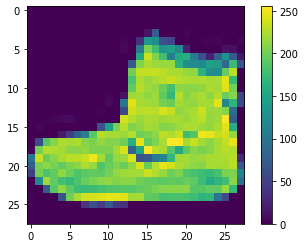

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

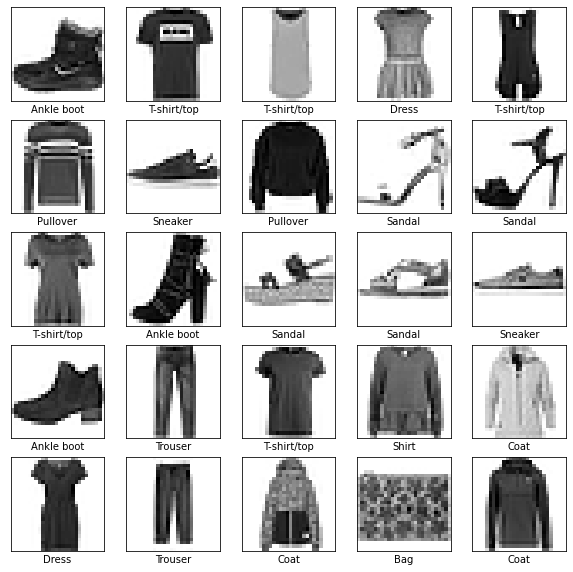

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


   1/1875 [..............................] - ETA: 20:52 - loss: 2.6274 - accuracy: 0.0938

  28/1875 [..............................] - ETA: 3s - loss: 1.3637 - accuracy: 0.5525   

  58/1875 [..............................] - ETA: 3s - loss: 1.1244 - accuracy: 0.6250

  88/1875 [>.............................] - ETA: 3s - loss: 0.9998 - accuracy: 0.6655

 117/1875 [>.............................] - ETA: 3s - loss: 0.9146 - accuracy: 0.6902

 147/1875 [=>............................] - ETA: 3s - loss: 0.8574 - accuracy: 0.7092

 177/1875 [=>............................] - ETA: 2s - loss: 0.8234 - accuracy: 0.7196

 206/1875 [==>...........................] - ETA: 2s - loss: 0.7861 - accuracy: 0.7332

 236/1875 [==>...........................] - ETA: 2s - loss: 0.7592 - accuracy: 0.7418

 266/1875 [===>..........................] - ETA: 2s - loss: 0.7424 - accuracy: 0.7460

 296/1875 [===>..........................] - ETA: 2s - loss: 0.7222 - accuracy: 0.7533

 324/1875 [====>.........................] - ETA: 2s - loss: 0.7121 - accuracy: 0.7555

 351/1875 [====>.........................] - ETA: 2s - loss: 0.6966 - accuracy: 0.7605

 380/1875 [=====>........................] - ETA: 2s - loss: 0.6831 - accuracy: 0.7646

 409/1875 [=====>........................] - ETA: 2s - loss: 0.6754 - accuracy: 0.7658

 439/1875 [======>.......................] - ETA: 2s - loss: 0.6624 - accuracy: 0.7714

 469/1875 [======>.......................] - ETA: 2s - loss: 0.6510 - accuracy: 0.7754

 498/1875 [======>.......................] - ETA: 2s - loss: 0.6437 - accuracy: 0.7775

 529/1875 [=======>......................] - ETA: 2s - loss: 0.6346 - accuracy: 0.7801

 559/1875 [=======>......................] - ETA: 2s - loss: 0.6273 - accuracy: 0.7829

 588/1875 [========>.....................] - ETA: 2s - loss: 0.6222 - accuracy: 0.7842

 618/1875 [========>.....................] - ETA: 2s - loss: 0.6163 - accuracy: 0.7862

 647/1875 [=========>....................] - ETA: 2s - loss: 0.6114 - accuracy: 0.7880

 677/1875 [=========>....................] - ETA: 2s - loss: 0.6064 - accuracy: 0.7894

 706/1875 [==========>...................] - ETA: 2s - loss: 0.6019 - accuracy: 0.7909

 735/1875 [==========>...................] - ETA: 1s - loss: 0.5967 - accuracy: 0.7928

 763/1875 [===========>..................] - ETA: 1s - loss: 0.5905 - accuracy: 0.7945

 793/1875 [===========>..................] - ETA: 1s - loss: 0.5851 - accuracy: 0.7964

 822/1875 [============>.................] - ETA: 1s - loss: 0.5819 - accuracy: 0.7970

 852/1875 [============>.................] - ETA: 1s - loss: 0.5791 - accuracy: 0.7985

 882/1875 [=============>................] - ETA: 1s - loss: 0.5749 - accuracy: 0.7999

 912/1875 [=============>................] - ETA: 1s - loss: 0.5718 - accuracy: 0.8009

 942/1875 [==============>...............] - ETA: 1s - loss: 0.5682 - accuracy: 0.8021

 970/1875 [==============>...............] - ETA: 1s - loss: 0.5655 - accuracy: 0.8027

 999/1875 [==============>...............] - ETA: 1s - loss: 0.5611 - accuracy: 0.8039

1029/1875 [===============>..............] - ETA: 1s - loss: 0.5582 - accuracy: 0.8050

1059/1875 [===============>..............] - ETA: 1s - loss: 0.5549 - accuracy: 0.8064

1088/1875 [================>.............] - ETA: 1s - loss: 0.5508 - accuracy: 0.8079

1118/1875 [================>.............] - ETA: 1s - loss: 0.5477 - accuracy: 0.8089

1147/1875 [=================>............] - ETA: 1s - loss: 0.5447 - accuracy: 0.8100

1173/1875 [=================>............] - ETA: 1s - loss: 0.5437 - accuracy: 0.8105

1199/1875 [==================>...........] - ETA: 1s - loss: 0.5412 - accuracy: 0.8114

1229/1875 [==================>...........] - ETA: 1s - loss: 0.5395 - accuracy: 0.8119

1258/1875 [===================>..........] - ETA: 1s - loss: 0.5363 - accuracy: 0.8129

1287/1875 [===================>..........] - ETA: 1s - loss: 0.5339 - accuracy: 0.8135

1317/1875 [====================>.........] - ETA: 0s - loss: 0.5320 - accuracy: 0.8140

1347/1875 [====================>.........] - ETA: 0s - loss: 0.5308 - accuracy: 0.8144

1377/1875 [=====================>........] - ETA: 0s - loss: 0.5296 - accuracy: 0.8149

1406/1875 [=====================>........] - ETA: 0s - loss: 0.5276 - accuracy: 0.8155

1436/1875 [=====================>........] - ETA: 0s - loss: 0.5254 - accuracy: 0.8163

1465/1875 [======================>.......] - ETA: 0s - loss: 0.5229 - accuracy: 0.8173

1495/1875 [======================>.......] - ETA: 0s - loss: 0.5212 - accuracy: 0.8177

1525/1875 [=======================>......] - ETA: 0s - loss: 0.5185 - accuracy: 0.8185

1554/1875 [=======================>......] - ETA: 0s - loss: 0.5166 - accuracy: 0.8195

1584/1875 [========================>.....] - ETA: 0s - loss: 0.5148 - accuracy: 0.8199

1614/1875 [========================>.....] - ETA: 0s - loss: 0.5133 - accuracy: 0.8203

1642/1875 [=========================>....] - ETA: 0s - loss: 0.5116 - accuracy: 0.8209

1671/1875 [=========================>....] - ETA: 0s - loss: 0.5092 - accuracy: 0.8217

1700/1875 [==========================>...] - ETA: 0s - loss: 0.5077 - accuracy: 0.8224

1729/1875 [==========================>...] - ETA: 0s - loss: 0.5063 - accuracy: 0.8228

1757/1875 [===========================>..] - ETA: 0s - loss: 0.5054 - accuracy: 0.8231

1785/1875 [===========================>..] - ETA: 0s - loss: 0.5040 - accuracy: 0.8237

1815/1875 [============================>.] - ETA: 0s - loss: 0.5024 - accuracy: 0.8242

1845/1875 [============================>.] - ETA: 0s - loss: 0.5007 - accuracy: 0.8248

1874/1875 [============================>.] - ETA: 0s - loss: 0.4987 - accuracy: 0.8252

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4986 - accuracy: 0.8253


Epoch 2/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2722 - accuracy: 0.8750

  30/1875 [..............................] - ETA: 3s - loss: 0.4308 - accuracy: 0.8802

  60/1875 [..............................] - ETA: 3s - loss: 0.4072 - accuracy: 0.8682

  89/1875 [>.............................] - ETA: 3s - loss: 0.3959 - accuracy: 0.8697

 119/1875 [>.............................] - ETA: 2s - loss: 0.3989 - accuracy: 0.8653

 149/1875 [=>............................] - ETA: 2s - loss: 0.3844 - accuracy: 0.8721

 179/1875 [=>............................] - ETA: 2s - loss: 0.3887 - accuracy: 0.8680

 209/1875 [==>...........................] - ETA: 2s - loss: 0.3907 - accuracy: 0.8666

 239/1875 [==>...........................] - ETA: 2s - loss: 0.3882 - accuracy: 0.8668

 268/1875 [===>..........................] - ETA: 2s - loss: 0.3843 - accuracy: 0.8677

 298/1875 [===>..........................] - ETA: 2s - loss: 0.3873 - accuracy: 0.8662

 328/1875 [====>.........................] - ETA: 2s - loss: 0.3875 - accuracy: 0.8663

 358/1875 [====>.........................] - ETA: 2s - loss: 0.3895 - accuracy: 0.8646

 387/1875 [=====>........................] - ETA: 2s - loss: 0.3862 - accuracy: 0.8653

 417/1875 [=====>........................] - ETA: 2s - loss: 0.3857 - accuracy: 0.8647

 447/1875 [======>.......................] - ETA: 2s - loss: 0.3865 - accuracy: 0.8644

 477/1875 [======>.......................] - ETA: 2s - loss: 0.3876 - accuracy: 0.8643

 506/1875 [=======>......................] - ETA: 2s - loss: 0.3879 - accuracy: 0.8639

 536/1875 [=======>......................] - ETA: 2s - loss: 0.3868 - accuracy: 0.8642

 565/1875 [========>.....................] - ETA: 2s - loss: 0.3858 - accuracy: 0.8648

 596/1875 [========>.....................] - ETA: 2s - loss: 0.3857 - accuracy: 0.8645

 625/1875 [=========>....................] - ETA: 2s - loss: 0.3849 - accuracy: 0.8651

 654/1875 [=========>....................] - ETA: 2s - loss: 0.3822 - accuracy: 0.8655

 684/1875 [=========>....................] - ETA: 2s - loss: 0.3803 - accuracy: 0.8663

 714/1875 [==========>...................] - ETA: 1s - loss: 0.3806 - accuracy: 0.8662

 744/1875 [==========>...................] - ETA: 1s - loss: 0.3810 - accuracy: 0.8656

 774/1875 [===========>..................] - ETA: 1s - loss: 0.3820 - accuracy: 0.8651

 804/1875 [===========>..................] - ETA: 1s - loss: 0.3827 - accuracy: 0.8651

 833/1875 [============>.................] - ETA: 1s - loss: 0.3810 - accuracy: 0.8654

 862/1875 [============>.................] - ETA: 1s - loss: 0.3826 - accuracy: 0.8647

 892/1875 [=============>................] - ETA: 1s - loss: 0.3819 - accuracy: 0.8649

 923/1875 [=============>................] - ETA: 1s - loss: 0.3821 - accuracy: 0.8642

 953/1875 [==============>...............] - ETA: 1s - loss: 0.3827 - accuracy: 0.8641

 983/1875 [==============>...............] - ETA: 1s - loss: 0.3811 - accuracy: 0.8644

1014/1875 [===============>..............] - ETA: 1s - loss: 0.3809 - accuracy: 0.8643

1043/1875 [===============>..............] - ETA: 1s - loss: 0.3804 - accuracy: 0.8642

1073/1875 [================>.............] - ETA: 1s - loss: 0.3805 - accuracy: 0.8638

1104/1875 [================>.............] - ETA: 1s - loss: 0.3800 - accuracy: 0.8640

1134/1875 [=================>............] - ETA: 1s - loss: 0.3797 - accuracy: 0.8640

1164/1875 [=================>............] - ETA: 1s - loss: 0.3800 - accuracy: 0.8642

1194/1875 [==================>...........] - ETA: 1s - loss: 0.3804 - accuracy: 0.8639

1224/1875 [==================>...........] - ETA: 1s - loss: 0.3809 - accuracy: 0.8639

1253/1875 [===================>..........] - ETA: 1s - loss: 0.3817 - accuracy: 0.8635

1283/1875 [===================>..........] - ETA: 1s - loss: 0.3815 - accuracy: 0.8634

1313/1875 [====================>.........] - ETA: 0s - loss: 0.3816 - accuracy: 0.8632

1342/1875 [====================>.........] - ETA: 0s - loss: 0.3812 - accuracy: 0.8635

1370/1875 [====================>.........] - ETA: 0s - loss: 0.3799 - accuracy: 0.8637

1400/1875 [=====================>........] - ETA: 0s - loss: 0.3796 - accuracy: 0.8638

1429/1875 [=====================>........] - ETA: 0s - loss: 0.3800 - accuracy: 0.8638

1458/1875 [======================>.......] - ETA: 0s - loss: 0.3790 - accuracy: 0.8640

1487/1875 [======================>.......] - ETA: 0s - loss: 0.3801 - accuracy: 0.8637

1517/1875 [=======================>......] - ETA: 0s - loss: 0.3796 - accuracy: 0.8638

1547/1875 [=======================>......] - ETA: 0s - loss: 0.3790 - accuracy: 0.8641

1577/1875 [========================>.....] - ETA: 0s - loss: 0.3784 - accuracy: 0.8643

1607/1875 [========================>.....] - ETA: 0s - loss: 0.3782 - accuracy: 0.8644

1636/1875 [=========================>....] - ETA: 0s - loss: 0.3784 - accuracy: 0.8643

1665/1875 [=========================>....] - ETA: 0s - loss: 0.3775 - accuracy: 0.8645

1694/1875 [==========================>...] - ETA: 0s - loss: 0.3767 - accuracy: 0.8646

1724/1875 [==========================>...] - ETA: 0s - loss: 0.3759 - accuracy: 0.8649

1751/1875 [===========================>..] - ETA: 0s - loss: 0.3761 - accuracy: 0.8648

1779/1875 [===========================>..] - ETA: 0s - loss: 0.3757 - accuracy: 0.8650

1807/1875 [===========================>..] - ETA: 0s - loss: 0.3754 - accuracy: 0.8650

1835/1875 [============================>.] - ETA: 0s - loss: 0.3755 - accuracy: 0.8651

1863/1875 [============================>.] - ETA: 0s - loss: 0.3754 - accuracy: 0.8650

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3751 - accuracy: 0.8651


Epoch 3/10


   1/1875 [..............................] - ETA: 5s - loss: 0.4147 - accuracy: 0.8750

  30/1875 [..............................] - ETA: 3s - loss: 0.3433 - accuracy: 0.8698

  59/1875 [..............................] - ETA: 3s - loss: 0.3579 - accuracy: 0.8671

  87/1875 [>.............................] - ETA: 3s - loss: 0.3515 - accuracy: 0.8718

 115/1875 [>.............................] - ETA: 3s - loss: 0.3453 - accuracy: 0.8769

 144/1875 [=>............................] - ETA: 3s - loss: 0.3525 - accuracy: 0.8728

 173/1875 [=>............................] - ETA: 3s - loss: 0.3454 - accuracy: 0.8754

 201/1875 [==>...........................] - ETA: 2s - loss: 0.3407 - accuracy: 0.8769

 230/1875 [==>...........................] - ETA: 2s - loss: 0.3394 - accuracy: 0.8755

 259/1875 [===>..........................] - ETA: 2s - loss: 0.3369 - accuracy: 0.8777

 289/1875 [===>..........................] - ETA: 2s - loss: 0.3383 - accuracy: 0.8767

 317/1875 [====>.........................] - ETA: 2s - loss: 0.3377 - accuracy: 0.8761

 346/1875 [====>.........................] - ETA: 2s - loss: 0.3457 - accuracy: 0.8727

 373/1875 [====>.........................] - ETA: 2s - loss: 0.3438 - accuracy: 0.8730

 400/1875 [=====>........................] - ETA: 2s - loss: 0.3447 - accuracy: 0.8729

 426/1875 [=====>........................] - ETA: 2s - loss: 0.3444 - accuracy: 0.8732

 452/1875 [======>.......................] - ETA: 2s - loss: 0.3443 - accuracy: 0.8738

 479/1875 [======>.......................] - ETA: 2s - loss: 0.3429 - accuracy: 0.8745

 507/1875 [=======>......................] - ETA: 2s - loss: 0.3410 - accuracy: 0.8751

 535/1875 [=======>......................] - ETA: 2s - loss: 0.3405 - accuracy: 0.8758

 564/1875 [========>.....................] - ETA: 2s - loss: 0.3435 - accuracy: 0.8745

 593/1875 [========>.....................] - ETA: 2s - loss: 0.3448 - accuracy: 0.8740

 621/1875 [========>.....................] - ETA: 2s - loss: 0.3427 - accuracy: 0.8747

 649/1875 [=========>....................] - ETA: 2s - loss: 0.3440 - accuracy: 0.8745

 676/1875 [=========>....................] - ETA: 2s - loss: 0.3449 - accuracy: 0.8737

 705/1875 [==========>...................] - ETA: 2s - loss: 0.3455 - accuracy: 0.8733

 733/1875 [==========>...................] - ETA: 2s - loss: 0.3446 - accuracy: 0.8737

 760/1875 [===========>..................] - ETA: 2s - loss: 0.3446 - accuracy: 0.8736

 788/1875 [===========>..................] - ETA: 1s - loss: 0.3444 - accuracy: 0.8737

 817/1875 [============>.................] - ETA: 1s - loss: 0.3431 - accuracy: 0.8742

 845/1875 [============>.................] - ETA: 1s - loss: 0.3429 - accuracy: 0.8741

 873/1875 [============>.................] - ETA: 1s - loss: 0.3429 - accuracy: 0.8742

 901/1875 [=============>................] - ETA: 1s - loss: 0.3413 - accuracy: 0.8749

 928/1875 [=============>................] - ETA: 1s - loss: 0.3396 - accuracy: 0.8757

 956/1875 [==============>...............] - ETA: 1s - loss: 0.3388 - accuracy: 0.8759

 985/1875 [==============>...............] - ETA: 1s - loss: 0.3385 - accuracy: 0.8764

1013/1875 [===============>..............] - ETA: 1s - loss: 0.3388 - accuracy: 0.8765

1042/1875 [===============>..............] - ETA: 1s - loss: 0.3392 - accuracy: 0.8762

1070/1875 [================>.............] - ETA: 1s - loss: 0.3394 - accuracy: 0.8763

1098/1875 [================>.............] - ETA: 1s - loss: 0.3395 - accuracy: 0.8763

1126/1875 [=================>............] - ETA: 1s - loss: 0.3396 - accuracy: 0.8764

1154/1875 [=================>............] - ETA: 1s - loss: 0.3397 - accuracy: 0.8765

1183/1875 [=================>............] - ETA: 1s - loss: 0.3388 - accuracy: 0.8767

1211/1875 [==================>...........] - ETA: 1s - loss: 0.3389 - accuracy: 0.8765

1240/1875 [==================>...........] - ETA: 1s - loss: 0.3383 - accuracy: 0.8766

1268/1875 [===================>..........] - ETA: 1s - loss: 0.3385 - accuracy: 0.8763

1297/1875 [===================>..........] - ETA: 1s - loss: 0.3394 - accuracy: 0.8760

1326/1875 [====================>.........] - ETA: 0s - loss: 0.3402 - accuracy: 0.8756

1354/1875 [====================>.........] - ETA: 0s - loss: 0.3395 - accuracy: 0.8759

1383/1875 [=====================>........] - ETA: 0s - loss: 0.3398 - accuracy: 0.8756

1412/1875 [=====================>........] - ETA: 0s - loss: 0.3404 - accuracy: 0.8752

1441/1875 [======================>.......] - ETA: 0s - loss: 0.3394 - accuracy: 0.8753

1470/1875 [======================>.......] - ETA: 0s - loss: 0.3394 - accuracy: 0.8755

1499/1875 [======================>.......] - ETA: 0s - loss: 0.3385 - accuracy: 0.8757

1528/1875 [=======================>......] - ETA: 0s - loss: 0.3387 - accuracy: 0.8757

1558/1875 [=======================>......] - ETA: 0s - loss: 0.3384 - accuracy: 0.8757

1587/1875 [========================>.....] - ETA: 0s - loss: 0.3383 - accuracy: 0.8757

1615/1875 [========================>.....] - ETA: 0s - loss: 0.3379 - accuracy: 0.8760

1643/1875 [=========================>....] - ETA: 0s - loss: 0.3387 - accuracy: 0.8758

1671/1875 [=========================>....] - ETA: 0s - loss: 0.3387 - accuracy: 0.8760

1700/1875 [==========================>...] - ETA: 0s - loss: 0.3378 - accuracy: 0.8763

1728/1875 [==========================>...] - ETA: 0s - loss: 0.3372 - accuracy: 0.8764

1758/1875 [===========================>..] - ETA: 0s - loss: 0.3371 - accuracy: 0.8764

1787/1875 [===========================>..] - ETA: 0s - loss: 0.3372 - accuracy: 0.8766

1816/1875 [============================>.] - ETA: 0s - loss: 0.3364 - accuracy: 0.8770

1846/1875 [============================>.] - ETA: 0s - loss: 0.3366 - accuracy: 0.8769

1874/1875 [============================>.] - ETA: 0s - loss: 0.3364 - accuracy: 0.8769

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3364 - accuracy: 0.8769


Epoch 4/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2474 - accuracy: 0.8750

  30/1875 [..............................] - ETA: 3s - loss: 0.3371 - accuracy: 0.8833

  60/1875 [..............................] - ETA: 3s - loss: 0.3428 - accuracy: 0.8771

  89/1875 [>.............................] - ETA: 3s - loss: 0.3295 - accuracy: 0.8824

 117/1875 [>.............................] - ETA: 3s - loss: 0.3273 - accuracy: 0.8833

 145/1875 [=>............................] - ETA: 3s - loss: 0.3222 - accuracy: 0.8834

 174/1875 [=>............................] - ETA: 2s - loss: 0.3170 - accuracy: 0.8824

 202/1875 [==>...........................] - ETA: 2s - loss: 0.3111 - accuracy: 0.8847

 231/1875 [==>...........................] - ETA: 2s - loss: 0.3133 - accuracy: 0.8843

 260/1875 [===>..........................] - ETA: 2s - loss: 0.3133 - accuracy: 0.8855

 288/1875 [===>..........................] - ETA: 2s - loss: 0.3168 - accuracy: 0.8849

 316/1875 [====>.........................] - ETA: 2s - loss: 0.3118 - accuracy: 0.8865

 345/1875 [====>.........................] - ETA: 2s - loss: 0.3111 - accuracy: 0.8871

 374/1875 [====>.........................] - ETA: 2s - loss: 0.3156 - accuracy: 0.8851

 402/1875 [=====>........................] - ETA: 2s - loss: 0.3126 - accuracy: 0.8860

 430/1875 [=====>........................] - ETA: 2s - loss: 0.3140 - accuracy: 0.8859

 459/1875 [======>.......................] - ETA: 2s - loss: 0.3130 - accuracy: 0.8866

 488/1875 [======>.......................] - ETA: 2s - loss: 0.3119 - accuracy: 0.8874

 517/1875 [=======>......................] - ETA: 2s - loss: 0.3114 - accuracy: 0.8882

 547/1875 [=======>......................] - ETA: 2s - loss: 0.3111 - accuracy: 0.8884

 576/1875 [========>.....................] - ETA: 2s - loss: 0.3127 - accuracy: 0.8876

 604/1875 [========>.....................] - ETA: 2s - loss: 0.3144 - accuracy: 0.8866

 633/1875 [=========>....................] - ETA: 2s - loss: 0.3149 - accuracy: 0.8860

 661/1875 [=========>....................] - ETA: 2s - loss: 0.3136 - accuracy: 0.8862

 690/1875 [==========>...................] - ETA: 2s - loss: 0.3137 - accuracy: 0.8860

 718/1875 [==========>...................] - ETA: 2s - loss: 0.3136 - accuracy: 0.8861

 747/1875 [==========>...................] - ETA: 1s - loss: 0.3129 - accuracy: 0.8858

 775/1875 [===========>..................] - ETA: 1s - loss: 0.3131 - accuracy: 0.8858

 803/1875 [===========>..................] - ETA: 1s - loss: 0.3130 - accuracy: 0.8855

 831/1875 [============>.................] - ETA: 1s - loss: 0.3140 - accuracy: 0.8851

 860/1875 [============>.................] - ETA: 1s - loss: 0.3170 - accuracy: 0.8843

 889/1875 [=============>................] - ETA: 1s - loss: 0.3172 - accuracy: 0.8842

 917/1875 [=============>................] - ETA: 1s - loss: 0.3160 - accuracy: 0.8847

 945/1875 [==============>...............] - ETA: 1s - loss: 0.3150 - accuracy: 0.8851

 973/1875 [==============>...............] - ETA: 1s - loss: 0.3158 - accuracy: 0.8853

1000/1875 [===============>..............] - ETA: 1s - loss: 0.3151 - accuracy: 0.8855

1027/1875 [===============>..............] - ETA: 1s - loss: 0.3154 - accuracy: 0.8852

1055/1875 [===============>..............] - ETA: 1s - loss: 0.3156 - accuracy: 0.8849

1083/1875 [================>.............] - ETA: 1s - loss: 0.3151 - accuracy: 0.8849

1111/1875 [================>.............] - ETA: 1s - loss: 0.3145 - accuracy: 0.8852

1139/1875 [=================>............] - ETA: 1s - loss: 0.3147 - accuracy: 0.8849

1167/1875 [=================>............] - ETA: 1s - loss: 0.3149 - accuracy: 0.8851

1196/1875 [==================>...........] - ETA: 1s - loss: 0.3146 - accuracy: 0.8851

1224/1875 [==================>...........] - ETA: 1s - loss: 0.3147 - accuracy: 0.8852

1253/1875 [===================>..........] - ETA: 1s - loss: 0.3147 - accuracy: 0.8851

1283/1875 [===================>..........] - ETA: 1s - loss: 0.3143 - accuracy: 0.8852

1312/1875 [===================>..........] - ETA: 1s - loss: 0.3144 - accuracy: 0.8851

1340/1875 [====================>.........] - ETA: 0s - loss: 0.3138 - accuracy: 0.8854

1369/1875 [====================>.........] - ETA: 0s - loss: 0.3147 - accuracy: 0.8852

1397/1875 [=====================>........] - ETA: 0s - loss: 0.3152 - accuracy: 0.8851

1425/1875 [=====================>........] - ETA: 0s - loss: 0.3150 - accuracy: 0.8854

1454/1875 [======================>.......] - ETA: 0s - loss: 0.3139 - accuracy: 0.8858

1482/1875 [======================>.......] - ETA: 0s - loss: 0.3149 - accuracy: 0.8855

1508/1875 [=======================>......] - ETA: 0s - loss: 0.3148 - accuracy: 0.8853

1535/1875 [=======================>......] - ETA: 0s - loss: 0.3144 - accuracy: 0.8854

1561/1875 [=======================>......] - ETA: 0s - loss: 0.3143 - accuracy: 0.8856

1587/1875 [========================>.....] - ETA: 0s - loss: 0.3139 - accuracy: 0.8856

1615/1875 [========================>.....] - ETA: 0s - loss: 0.3138 - accuracy: 0.8855

1644/1875 [=========================>....] - ETA: 0s - loss: 0.3138 - accuracy: 0.8855

1672/1875 [=========================>....] - ETA: 0s - loss: 0.3137 - accuracy: 0.8857

1699/1875 [==========================>...] - ETA: 0s - loss: 0.3127 - accuracy: 0.8859

1727/1875 [==========================>...] - ETA: 0s - loss: 0.3124 - accuracy: 0.8862

1754/1875 [===========================>..] - ETA: 0s - loss: 0.3128 - accuracy: 0.8861

1782/1875 [===========================>..] - ETA: 0s - loss: 0.3129 - accuracy: 0.8860

1810/1875 [===========================>..] - ETA: 0s - loss: 0.3127 - accuracy: 0.8860

1840/1875 [============================>.] - ETA: 0s - loss: 0.3125 - accuracy: 0.8859

1869/1875 [============================>.] - ETA: 0s - loss: 0.3123 - accuracy: 0.8859

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3124 - accuracy: 0.8858


Epoch 5/10


   1/1875 [..............................] - ETA: 4s - loss: 0.5190 - accuracy: 0.8438

  30/1875 [..............................] - ETA: 3s - loss: 0.3433 - accuracy: 0.8542

  58/1875 [..............................] - ETA: 3s - loss: 0.3099 - accuracy: 0.8739

  86/1875 [>.............................] - ETA: 3s - loss: 0.3087 - accuracy: 0.8732

 114/1875 [>.............................] - ETA: 3s - loss: 0.3008 - accuracy: 0.8780

 142/1875 [=>............................] - ETA: 3s - loss: 0.2974 - accuracy: 0.8792

 171/1875 [=>............................] - ETA: 3s - loss: 0.2989 - accuracy: 0.8808

 199/1875 [==>...........................] - ETA: 3s - loss: 0.2948 - accuracy: 0.8825

 228/1875 [==>...........................] - ETA: 2s - loss: 0.2942 - accuracy: 0.8847

 257/1875 [===>..........................] - ETA: 2s - loss: 0.2977 - accuracy: 0.8844

 286/1875 [===>..........................] - ETA: 2s - loss: 0.2951 - accuracy: 0.8861

 314/1875 [====>.........................] - ETA: 2s - loss: 0.2928 - accuracy: 0.8875

 342/1875 [====>.........................] - ETA: 2s - loss: 0.2900 - accuracy: 0.8885

 371/1875 [====>.........................] - ETA: 2s - loss: 0.2905 - accuracy: 0.8887

 399/1875 [=====>........................] - ETA: 2s - loss: 0.2922 - accuracy: 0.8878

 426/1875 [=====>........................] - ETA: 2s - loss: 0.2940 - accuracy: 0.8878

 454/1875 [======>.......................] - ETA: 2s - loss: 0.2966 - accuracy: 0.8872

 483/1875 [======>.......................] - ETA: 2s - loss: 0.2945 - accuracy: 0.8881

 512/1875 [=======>......................] - ETA: 2s - loss: 0.2958 - accuracy: 0.8877

 540/1875 [=======>......................] - ETA: 2s - loss: 0.2950 - accuracy: 0.8880

 569/1875 [========>.....................] - ETA: 2s - loss: 0.2931 - accuracy: 0.8890

 598/1875 [========>.....................] - ETA: 2s - loss: 0.2897 - accuracy: 0.8905

 626/1875 [=========>....................] - ETA: 2s - loss: 0.2902 - accuracy: 0.8904

 655/1875 [=========>....................] - ETA: 2s - loss: 0.2904 - accuracy: 0.8903

 683/1875 [=========>....................] - ETA: 2s - loss: 0.2918 - accuracy: 0.8901

 712/1875 [==========>...................] - ETA: 2s - loss: 0.2920 - accuracy: 0.8910

 741/1875 [==========>...................] - ETA: 2s - loss: 0.2926 - accuracy: 0.8911

 769/1875 [===========>..................] - ETA: 1s - loss: 0.2924 - accuracy: 0.8913

 797/1875 [===========>..................] - ETA: 1s - loss: 0.2919 - accuracy: 0.8914

 825/1875 [============>.................] - ETA: 1s - loss: 0.2921 - accuracy: 0.8911

 854/1875 [============>.................] - ETA: 1s - loss: 0.2921 - accuracy: 0.8911

 882/1875 [=============>................] - ETA: 1s - loss: 0.2932 - accuracy: 0.8908

 910/1875 [=============>................] - ETA: 1s - loss: 0.2939 - accuracy: 0.8905

 939/1875 [==============>...............] - ETA: 1s - loss: 0.2936 - accuracy: 0.8907

 968/1875 [==============>...............] - ETA: 1s - loss: 0.2937 - accuracy: 0.8909

 995/1875 [==============>...............] - ETA: 1s - loss: 0.2933 - accuracy: 0.8913

1024/1875 [===============>..............] - ETA: 1s - loss: 0.2934 - accuracy: 0.8911

1052/1875 [===============>..............] - ETA: 1s - loss: 0.2942 - accuracy: 0.8910

1080/1875 [================>.............] - ETA: 1s - loss: 0.2945 - accuracy: 0.8908

1107/1875 [================>.............] - ETA: 1s - loss: 0.2944 - accuracy: 0.8909

1135/1875 [=================>............] - ETA: 1s - loss: 0.2940 - accuracy: 0.8911

1163/1875 [=================>............] - ETA: 1s - loss: 0.2940 - accuracy: 0.8908

1191/1875 [==================>...........] - ETA: 1s - loss: 0.2951 - accuracy: 0.8906

1219/1875 [==================>...........] - ETA: 1s - loss: 0.2948 - accuracy: 0.8907

1246/1875 [==================>...........] - ETA: 1s - loss: 0.2941 - accuracy: 0.8910

1273/1875 [===================>..........] - ETA: 1s - loss: 0.2951 - accuracy: 0.8907

1301/1875 [===================>..........] - ETA: 1s - loss: 0.2949 - accuracy: 0.8908

1330/1875 [====================>.........] - ETA: 0s - loss: 0.2956 - accuracy: 0.8905

1357/1875 [====================>.........] - ETA: 0s - loss: 0.2949 - accuracy: 0.8908

1385/1875 [=====================>........] - ETA: 0s - loss: 0.2950 - accuracy: 0.8908

1414/1875 [=====================>........] - ETA: 0s - loss: 0.2944 - accuracy: 0.8911

1442/1875 [======================>.......] - ETA: 0s - loss: 0.2946 - accuracy: 0.8911

1471/1875 [======================>.......] - ETA: 0s - loss: 0.2945 - accuracy: 0.8913

1499/1875 [======================>.......] - ETA: 0s - loss: 0.2938 - accuracy: 0.8914

1526/1875 [=======================>......] - ETA: 0s - loss: 0.2928 - accuracy: 0.8918

1553/1875 [=======================>......] - ETA: 0s - loss: 0.2928 - accuracy: 0.8916

1581/1875 [========================>.....] - ETA: 0s - loss: 0.2926 - accuracy: 0.8918

1609/1875 [========================>.....] - ETA: 0s - loss: 0.2930 - accuracy: 0.8917

1637/1875 [=========================>....] - ETA: 0s - loss: 0.2934 - accuracy: 0.8918

1666/1875 [=========================>....] - ETA: 0s - loss: 0.2944 - accuracy: 0.8915

1692/1875 [==========================>...] - ETA: 0s - loss: 0.2941 - accuracy: 0.8915

1718/1875 [==========================>...] - ETA: 0s - loss: 0.2945 - accuracy: 0.8914

1745/1875 [==========================>...] - ETA: 0s - loss: 0.2950 - accuracy: 0.8912

1772/1875 [===========================>..] - ETA: 0s - loss: 0.2948 - accuracy: 0.8912

1800/1875 [===========================>..] - ETA: 0s - loss: 0.2950 - accuracy: 0.8912

1828/1875 [============================>.] - ETA: 0s - loss: 0.2948 - accuracy: 0.8915

1857/1875 [============================>.] - ETA: 0s - loss: 0.2951 - accuracy: 0.8912

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2949 - accuracy: 0.8913


Epoch 6/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2687 - accuracy: 0.8750

  30/1875 [..............................] - ETA: 3s - loss: 0.2822 - accuracy: 0.8969

  59/1875 [..............................] - ETA: 3s - loss: 0.2599 - accuracy: 0.9110

  89/1875 [>.............................] - ETA: 3s - loss: 0.2616 - accuracy: 0.9062

 117/1875 [>.............................] - ETA: 3s - loss: 0.2753 - accuracy: 0.9001

 146/1875 [=>............................] - ETA: 3s - loss: 0.2703 - accuracy: 0.9043

 175/1875 [=>............................] - ETA: 2s - loss: 0.2669 - accuracy: 0.9025

 204/1875 [==>...........................] - ETA: 2s - loss: 0.2670 - accuracy: 0.9018

 232/1875 [==>...........................] - ETA: 2s - loss: 0.2684 - accuracy: 0.9019

 261/1875 [===>..........................] - ETA: 2s - loss: 0.2760 - accuracy: 0.8983

 289/1875 [===>..........................] - ETA: 2s - loss: 0.2736 - accuracy: 0.8995

 318/1875 [====>.........................] - ETA: 2s - loss: 0.2759 - accuracy: 0.8982

 347/1875 [====>.........................] - ETA: 2s - loss: 0.2769 - accuracy: 0.8977

 376/1875 [=====>........................] - ETA: 2s - loss: 0.2786 - accuracy: 0.8974

 405/1875 [=====>........................] - ETA: 2s - loss: 0.2796 - accuracy: 0.8968

 433/1875 [=====>........................] - ETA: 2s - loss: 0.2779 - accuracy: 0.8965

 462/1875 [======>.......................] - ETA: 2s - loss: 0.2774 - accuracy: 0.8966

 490/1875 [======>.......................] - ETA: 2s - loss: 0.2771 - accuracy: 0.8972

 519/1875 [=======>......................] - ETA: 2s - loss: 0.2755 - accuracy: 0.8980

 547/1875 [=======>......................] - ETA: 2s - loss: 0.2744 - accuracy: 0.8988

 575/1875 [========>.....................] - ETA: 2s - loss: 0.2740 - accuracy: 0.8986

 603/1875 [========>.....................] - ETA: 2s - loss: 0.2734 - accuracy: 0.8984

 631/1875 [=========>....................] - ETA: 2s - loss: 0.2753 - accuracy: 0.8974

 659/1875 [=========>....................] - ETA: 2s - loss: 0.2747 - accuracy: 0.8975

 687/1875 [=========>....................] - ETA: 2s - loss: 0.2738 - accuracy: 0.8977

 715/1875 [==========>...................] - ETA: 2s - loss: 0.2737 - accuracy: 0.8974

 743/1875 [==========>...................] - ETA: 2s - loss: 0.2734 - accuracy: 0.8975

 770/1875 [===========>..................] - ETA: 1s - loss: 0.2720 - accuracy: 0.8977

 799/1875 [===========>..................] - ETA: 1s - loss: 0.2718 - accuracy: 0.8978

 829/1875 [============>.................] - ETA: 1s - loss: 0.2719 - accuracy: 0.8981

 858/1875 [============>.................] - ETA: 1s - loss: 0.2719 - accuracy: 0.8985

 888/1875 [=============>................] - ETA: 1s - loss: 0.2719 - accuracy: 0.8984

 917/1875 [=============>................] - ETA: 1s - loss: 0.2730 - accuracy: 0.8979

 945/1875 [==============>...............] - ETA: 1s - loss: 0.2722 - accuracy: 0.8981

 975/1875 [==============>...............] - ETA: 1s - loss: 0.2720 - accuracy: 0.8981

1004/1875 [===============>..............] - ETA: 1s - loss: 0.2728 - accuracy: 0.8980

1032/1875 [===============>..............] - ETA: 1s - loss: 0.2728 - accuracy: 0.8979

1062/1875 [===============>..............] - ETA: 1s - loss: 0.2727 - accuracy: 0.8978

1091/1875 [================>.............] - ETA: 1s - loss: 0.2722 - accuracy: 0.8983

1120/1875 [================>.............] - ETA: 1s - loss: 0.2729 - accuracy: 0.8983

1149/1875 [=================>............] - ETA: 1s - loss: 0.2730 - accuracy: 0.8982

1178/1875 [=================>............] - ETA: 1s - loss: 0.2721 - accuracy: 0.8985

1207/1875 [==================>...........] - ETA: 1s - loss: 0.2721 - accuracy: 0.8986

1236/1875 [==================>...........] - ETA: 1s - loss: 0.2723 - accuracy: 0.8986

1265/1875 [===================>..........] - ETA: 1s - loss: 0.2726 - accuracy: 0.8983

1294/1875 [===================>..........] - ETA: 1s - loss: 0.2739 - accuracy: 0.8976

1323/1875 [====================>.........] - ETA: 0s - loss: 0.2746 - accuracy: 0.8975

1352/1875 [====================>.........] - ETA: 0s - loss: 0.2743 - accuracy: 0.8978

1381/1875 [=====================>........] - ETA: 0s - loss: 0.2740 - accuracy: 0.8979

1411/1875 [=====================>........] - ETA: 0s - loss: 0.2738 - accuracy: 0.8979

1440/1875 [======================>.......] - ETA: 0s - loss: 0.2744 - accuracy: 0.8980

1468/1875 [======================>.......] - ETA: 0s - loss: 0.2748 - accuracy: 0.8979

1498/1875 [======================>.......] - ETA: 0s - loss: 0.2756 - accuracy: 0.8980

1527/1875 [=======================>......] - ETA: 0s - loss: 0.2752 - accuracy: 0.8979

1556/1875 [=======================>......] - ETA: 0s - loss: 0.2754 - accuracy: 0.8979

1585/1875 [========================>.....] - ETA: 0s - loss: 0.2750 - accuracy: 0.8982

1613/1875 [========================>.....] - ETA: 0s - loss: 0.2752 - accuracy: 0.8982

1642/1875 [=========================>....] - ETA: 0s - loss: 0.2758 - accuracy: 0.8980

1671/1875 [=========================>....] - ETA: 0s - loss: 0.2763 - accuracy: 0.8978

1700/1875 [==========================>...] - ETA: 0s - loss: 0.2761 - accuracy: 0.8980

1728/1875 [==========================>...] - ETA: 0s - loss: 0.2765 - accuracy: 0.8979

1757/1875 [===========================>..] - ETA: 0s - loss: 0.2767 - accuracy: 0.8978

1787/1875 [===========================>..] - ETA: 0s - loss: 0.2764 - accuracy: 0.8979

1816/1875 [============================>.] - ETA: 0s - loss: 0.2772 - accuracy: 0.8976

1845/1875 [============================>.] - ETA: 0s - loss: 0.2771 - accuracy: 0.8977

1875/1875 [==============================] - ETA: 0s - loss: 0.2776 - accuracy: 0.8977

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2776 - accuracy: 0.8977


Epoch 7/10


   1/1875 [..............................] - ETA: 5s - loss: 0.3025 - accuracy: 0.9062

  30/1875 [..............................] - ETA: 3s - loss: 0.2856 - accuracy: 0.8938

  59/1875 [..............................] - ETA: 3s - loss: 0.2753 - accuracy: 0.8988

  88/1875 [>.............................] - ETA: 3s - loss: 0.2659 - accuracy: 0.9027

 117/1875 [>.............................] - ETA: 3s - loss: 0.2761 - accuracy: 0.8969

 145/1875 [=>............................] - ETA: 3s - loss: 0.2800 - accuracy: 0.8970

 174/1875 [=>............................] - ETA: 2s - loss: 0.2841 - accuracy: 0.8955

 202/1875 [==>...........................] - ETA: 2s - loss: 0.2834 - accuracy: 0.8953

 231/1875 [==>...........................] - ETA: 2s - loss: 0.2828 - accuracy: 0.8954

 260/1875 [===>..........................] - ETA: 2s - loss: 0.2783 - accuracy: 0.8965

 287/1875 [===>..........................] - ETA: 2s - loss: 0.2769 - accuracy: 0.8976

 314/1875 [====>.........................] - ETA: 2s - loss: 0.2756 - accuracy: 0.8975

 341/1875 [====>.........................] - ETA: 2s - loss: 0.2729 - accuracy: 0.8990

 369/1875 [====>.........................] - ETA: 2s - loss: 0.2721 - accuracy: 0.8994

 398/1875 [=====>........................] - ETA: 2s - loss: 0.2673 - accuracy: 0.9011

 427/1875 [=====>........................] - ETA: 2s - loss: 0.2658 - accuracy: 0.9017

 456/1875 [======>.......................] - ETA: 2s - loss: 0.2651 - accuracy: 0.9021

 485/1875 [======>.......................] - ETA: 2s - loss: 0.2653 - accuracy: 0.9021

 514/1875 [=======>......................] - ETA: 2s - loss: 0.2639 - accuracy: 0.9026

 542/1875 [=======>......................] - ETA: 2s - loss: 0.2643 - accuracy: 0.9019

 570/1875 [========>.....................] - ETA: 2s - loss: 0.2652 - accuracy: 0.9015

 599/1875 [========>.....................] - ETA: 2s - loss: 0.2667 - accuracy: 0.9012

 628/1875 [=========>....................] - ETA: 2s - loss: 0.2647 - accuracy: 0.9018

 656/1875 [=========>....................] - ETA: 2s - loss: 0.2646 - accuracy: 0.9022

 684/1875 [=========>....................] - ETA: 2s - loss: 0.2657 - accuracy: 0.9020

 713/1875 [==========>...................] - ETA: 2s - loss: 0.2683 - accuracy: 0.9009

 742/1875 [==========>...................] - ETA: 2s - loss: 0.2663 - accuracy: 0.9015

 772/1875 [===========>..................] - ETA: 1s - loss: 0.2665 - accuracy: 0.9018

 801/1875 [===========>..................] - ETA: 1s - loss: 0.2651 - accuracy: 0.9025

 830/1875 [============>.................] - ETA: 1s - loss: 0.2643 - accuracy: 0.9024

 858/1875 [============>.................] - ETA: 1s - loss: 0.2650 - accuracy: 0.9021

 887/1875 [=============>................] - ETA: 1s - loss: 0.2641 - accuracy: 0.9021

 913/1875 [=============>................] - ETA: 1s - loss: 0.2628 - accuracy: 0.9025

 940/1875 [==============>...............] - ETA: 1s - loss: 0.2635 - accuracy: 0.9023

 967/1875 [==============>...............] - ETA: 1s - loss: 0.2648 - accuracy: 0.9021

 994/1875 [==============>...............] - ETA: 1s - loss: 0.2646 - accuracy: 0.9021

1024/1875 [===============>..............] - ETA: 1s - loss: 0.2647 - accuracy: 0.9023

1054/1875 [===============>..............] - ETA: 1s - loss: 0.2650 - accuracy: 0.9023

1084/1875 [================>.............] - ETA: 1s - loss: 0.2649 - accuracy: 0.9023

1114/1875 [================>.............] - ETA: 1s - loss: 0.2649 - accuracy: 0.9024

1144/1875 [=================>............] - ETA: 1s - loss: 0.2657 - accuracy: 0.9023

1174/1875 [=================>............] - ETA: 1s - loss: 0.2644 - accuracy: 0.9027

1203/1875 [==================>...........] - ETA: 1s - loss: 0.2643 - accuracy: 0.9027

1233/1875 [==================>...........] - ETA: 1s - loss: 0.2644 - accuracy: 0.9027

1262/1875 [===================>..........] - ETA: 1s - loss: 0.2650 - accuracy: 0.9025

1291/1875 [===================>..........] - ETA: 1s - loss: 0.2657 - accuracy: 0.9021

1319/1875 [====================>.........] - ETA: 0s - loss: 0.2660 - accuracy: 0.9021

1348/1875 [====================>.........] - ETA: 0s - loss: 0.2667 - accuracy: 0.9020

1378/1875 [=====================>........] - ETA: 0s - loss: 0.2664 - accuracy: 0.9022

1408/1875 [=====================>........] - ETA: 0s - loss: 0.2664 - accuracy: 0.9023

1438/1875 [======================>.......] - ETA: 0s - loss: 0.2664 - accuracy: 0.9024

1468/1875 [======================>.......] - ETA: 0s - loss: 0.2666 - accuracy: 0.9024

1499/1875 [======================>.......] - ETA: 0s - loss: 0.2664 - accuracy: 0.9025

1530/1875 [=======================>......] - ETA: 0s - loss: 0.2661 - accuracy: 0.9026

1559/1875 [=======================>......] - ETA: 0s - loss: 0.2663 - accuracy: 0.9026

1588/1875 [========================>.....] - ETA: 0s - loss: 0.2668 - accuracy: 0.9025

1617/1875 [========================>.....] - ETA: 0s - loss: 0.2670 - accuracy: 0.9023

1646/1875 [=========================>....] - ETA: 0s - loss: 0.2666 - accuracy: 0.9024

1675/1875 [=========================>....] - ETA: 0s - loss: 0.2675 - accuracy: 0.9022

1703/1875 [==========================>...] - ETA: 0s - loss: 0.2673 - accuracy: 0.9022

1732/1875 [==========================>...] - ETA: 0s - loss: 0.2671 - accuracy: 0.9023

1761/1875 [===========================>..] - ETA: 0s - loss: 0.2673 - accuracy: 0.9023

1791/1875 [===========================>..] - ETA: 0s - loss: 0.2668 - accuracy: 0.9024

1820/1875 [============================>.] - ETA: 0s - loss: 0.2666 - accuracy: 0.9024

1848/1875 [============================>.] - ETA: 0s - loss: 0.2667 - accuracy: 0.9025

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2669 - accuracy: 0.9022


Epoch 8/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2833 - accuracy: 0.8750

  31/1875 [..............................] - ETA: 3s - loss: 0.2458 - accuracy: 0.9123

  61/1875 [..............................] - ETA: 3s - loss: 0.2450 - accuracy: 0.9047

  90/1875 [>.............................] - ETA: 3s - loss: 0.2351 - accuracy: 0.9135

 121/1875 [>.............................] - ETA: 2s - loss: 0.2413 - accuracy: 0.9104

 151/1875 [=>............................] - ETA: 2s - loss: 0.2383 - accuracy: 0.9104

 181/1875 [=>............................] - ETA: 2s - loss: 0.2410 - accuracy: 0.9095

 211/1875 [==>...........................] - ETA: 2s - loss: 0.2409 - accuracy: 0.9100

 241/1875 [==>...........................] - ETA: 2s - loss: 0.2465 - accuracy: 0.9085

 269/1875 [===>..........................] - ETA: 2s - loss: 0.2488 - accuracy: 0.9076

 298/1875 [===>..........................] - ETA: 2s - loss: 0.2478 - accuracy: 0.9080

 326/1875 [====>.........................] - ETA: 2s - loss: 0.2466 - accuracy: 0.9085

 354/1875 [====>.........................] - ETA: 2s - loss: 0.2481 - accuracy: 0.9075

 383/1875 [=====>........................] - ETA: 2s - loss: 0.2480 - accuracy: 0.9078

 413/1875 [=====>........................] - ETA: 2s - loss: 0.2501 - accuracy: 0.9074

 443/1875 [======>.......................] - ETA: 2s - loss: 0.2499 - accuracy: 0.9072

 473/1875 [======>.......................] - ETA: 2s - loss: 0.2494 - accuracy: 0.9074

 503/1875 [=======>......................] - ETA: 2s - loss: 0.2486 - accuracy: 0.9077

 533/1875 [=======>......................] - ETA: 2s - loss: 0.2480 - accuracy: 0.9087

 563/1875 [========>.....................] - ETA: 2s - loss: 0.2462 - accuracy: 0.9085

 593/1875 [========>.....................] - ETA: 2s - loss: 0.2476 - accuracy: 0.9080

 622/1875 [========>.....................] - ETA: 2s - loss: 0.2470 - accuracy: 0.9082

 652/1875 [=========>....................] - ETA: 2s - loss: 0.2484 - accuracy: 0.9076

 681/1875 [=========>....................] - ETA: 2s - loss: 0.2484 - accuracy: 0.9073

 711/1875 [==========>...................] - ETA: 1s - loss: 0.2488 - accuracy: 0.9067

 741/1875 [==========>...................] - ETA: 1s - loss: 0.2483 - accuracy: 0.9068

 772/1875 [===========>..................] - ETA: 1s - loss: 0.2504 - accuracy: 0.9065

 802/1875 [===========>..................] - ETA: 1s - loss: 0.2501 - accuracy: 0.9066

 831/1875 [============>.................] - ETA: 1s - loss: 0.2524 - accuracy: 0.9056

 860/1875 [============>.................] - ETA: 1s - loss: 0.2534 - accuracy: 0.9053

 890/1875 [=============>................] - ETA: 1s - loss: 0.2528 - accuracy: 0.9055

 919/1875 [=============>................] - ETA: 1s - loss: 0.2537 - accuracy: 0.9049

 948/1875 [==============>...............] - ETA: 1s - loss: 0.2532 - accuracy: 0.9051

 977/1875 [==============>...............] - ETA: 1s - loss: 0.2527 - accuracy: 0.9050

1008/1875 [===============>..............] - ETA: 1s - loss: 0.2533 - accuracy: 0.9048

1038/1875 [===============>..............] - ETA: 1s - loss: 0.2543 - accuracy: 0.9045

1068/1875 [================>.............] - ETA: 1s - loss: 0.2543 - accuracy: 0.9048

1098/1875 [================>.............] - ETA: 1s - loss: 0.2545 - accuracy: 0.9047

1128/1875 [=================>............] - ETA: 1s - loss: 0.2541 - accuracy: 0.9049

1157/1875 [=================>............] - ETA: 1s - loss: 0.2538 - accuracy: 0.9051

1186/1875 [=================>............] - ETA: 1s - loss: 0.2538 - accuracy: 0.9051

1216/1875 [==================>...........] - ETA: 1s - loss: 0.2536 - accuracy: 0.9054

1246/1875 [==================>...........] - ETA: 1s - loss: 0.2537 - accuracy: 0.9054

1275/1875 [===================>..........] - ETA: 1s - loss: 0.2535 - accuracy: 0.9053

1304/1875 [===================>..........] - ETA: 0s - loss: 0.2531 - accuracy: 0.9054

1332/1875 [====================>.........] - ETA: 0s - loss: 0.2534 - accuracy: 0.9055

1360/1875 [====================>.........] - ETA: 0s - loss: 0.2531 - accuracy: 0.9057

1390/1875 [=====================>........] - ETA: 0s - loss: 0.2533 - accuracy: 0.9057

1420/1875 [=====================>........] - ETA: 0s - loss: 0.2535 - accuracy: 0.9056

1450/1875 [======================>.......] - ETA: 0s - loss: 0.2536 - accuracy: 0.9057

1480/1875 [======================>.......] - ETA: 0s - loss: 0.2530 - accuracy: 0.9059

1511/1875 [=======================>......] - ETA: 0s - loss: 0.2536 - accuracy: 0.9059

1541/1875 [=======================>......] - ETA: 0s - loss: 0.2539 - accuracy: 0.9059

1571/1875 [========================>.....] - ETA: 0s - loss: 0.2541 - accuracy: 0.9058

1601/1875 [========================>.....] - ETA: 0s - loss: 0.2540 - accuracy: 0.9058

1631/1875 [=========================>....] - ETA: 0s - loss: 0.2548 - accuracy: 0.9053

1660/1875 [=========================>....] - ETA: 0s - loss: 0.2552 - accuracy: 0.9050

1690/1875 [==========================>...] - ETA: 0s - loss: 0.2554 - accuracy: 0.9048

1719/1875 [==========================>...] - ETA: 0s - loss: 0.2554 - accuracy: 0.9046

1748/1875 [==========================>...] - ETA: 0s - loss: 0.2547 - accuracy: 0.9048

1777/1875 [===========================>..] - ETA: 0s - loss: 0.2545 - accuracy: 0.9048

1808/1875 [===========================>..] - ETA: 0s - loss: 0.2552 - accuracy: 0.9046

1838/1875 [============================>.] - ETA: 0s - loss: 0.2555 - accuracy: 0.9045

1868/1875 [============================>.] - ETA: 0s - loss: 0.2554 - accuracy: 0.9045

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2552 - accuracy: 0.9046


Epoch 9/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2380 - accuracy: 0.9375

  31/1875 [..............................] - ETA: 3s - loss: 0.2472 - accuracy: 0.9224

  61/1875 [..............................] - ETA: 3s - loss: 0.2533 - accuracy: 0.9114

  91/1875 [>.............................] - ETA: 3s - loss: 0.2586 - accuracy: 0.9080

 121/1875 [>.............................] - ETA: 2s - loss: 0.2555 - accuracy: 0.9062

 150/1875 [=>............................] - ETA: 2s - loss: 0.2534 - accuracy: 0.9054

 179/1875 [=>............................] - ETA: 2s - loss: 0.2510 - accuracy: 0.9068

 208/1875 [==>...........................] - ETA: 2s - loss: 0.2474 - accuracy: 0.9079

 238/1875 [==>...........................] - ETA: 2s - loss: 0.2460 - accuracy: 0.9086

 268/1875 [===>..........................] - ETA: 2s - loss: 0.2413 - accuracy: 0.9110

 299/1875 [===>..........................] - ETA: 2s - loss: 0.2429 - accuracy: 0.9100

 328/1875 [====>.........................] - ETA: 2s - loss: 0.2421 - accuracy: 0.9110

 358/1875 [====>.........................] - ETA: 2s - loss: 0.2456 - accuracy: 0.9100

 388/1875 [=====>........................] - ETA: 2s - loss: 0.2416 - accuracy: 0.9113

 418/1875 [=====>........................] - ETA: 2s - loss: 0.2411 - accuracy: 0.9109

 447/1875 [======>.......................] - ETA: 2s - loss: 0.2424 - accuracy: 0.9105

 477/1875 [======>.......................] - ETA: 2s - loss: 0.2454 - accuracy: 0.9094

 507/1875 [=======>......................] - ETA: 2s - loss: 0.2443 - accuracy: 0.9098

 537/1875 [=======>......................] - ETA: 2s - loss: 0.2428 - accuracy: 0.9109

 566/1875 [========>.....................] - ETA: 2s - loss: 0.2420 - accuracy: 0.9108

 595/1875 [========>.....................] - ETA: 2s - loss: 0.2414 - accuracy: 0.9103

 624/1875 [========>.....................] - ETA: 2s - loss: 0.2413 - accuracy: 0.9103

 653/1875 [=========>....................] - ETA: 2s - loss: 0.2423 - accuracy: 0.9099

 683/1875 [=========>....................] - ETA: 2s - loss: 0.2409 - accuracy: 0.9101

 713/1875 [==========>...................] - ETA: 1s - loss: 0.2422 - accuracy: 0.9098

 742/1875 [==========>...................] - ETA: 1s - loss: 0.2434 - accuracy: 0.9096

 771/1875 [===========>..................] - ETA: 1s - loss: 0.2428 - accuracy: 0.9098

 801/1875 [===========>..................] - ETA: 1s - loss: 0.2424 - accuracy: 0.9099

 831/1875 [============>.................] - ETA: 1s - loss: 0.2423 - accuracy: 0.9099

 862/1875 [============>.................] - ETA: 1s - loss: 0.2421 - accuracy: 0.9102

 892/1875 [=============>................] - ETA: 1s - loss: 0.2424 - accuracy: 0.9101

 921/1875 [=============>................] - ETA: 1s - loss: 0.2436 - accuracy: 0.9099

 950/1875 [==============>...............] - ETA: 1s - loss: 0.2434 - accuracy: 0.9096

 980/1875 [==============>...............] - ETA: 1s - loss: 0.2436 - accuracy: 0.9095

1011/1875 [===============>..............] - ETA: 1s - loss: 0.2436 - accuracy: 0.9092

1040/1875 [===============>..............] - ETA: 1s - loss: 0.2437 - accuracy: 0.9094

1069/1875 [================>.............] - ETA: 1s - loss: 0.2440 - accuracy: 0.9096

1099/1875 [================>.............] - ETA: 1s - loss: 0.2433 - accuracy: 0.9096

1129/1875 [=================>............] - ETA: 1s - loss: 0.2445 - accuracy: 0.9094

1158/1875 [=================>............] - ETA: 1s - loss: 0.2443 - accuracy: 0.9093

1188/1875 [==================>...........] - ETA: 1s - loss: 0.2441 - accuracy: 0.9094

1218/1875 [==================>...........] - ETA: 1s - loss: 0.2446 - accuracy: 0.9095

1248/1875 [==================>...........] - ETA: 1s - loss: 0.2445 - accuracy: 0.9095

1278/1875 [===================>..........] - ETA: 1s - loss: 0.2442 - accuracy: 0.9097

1308/1875 [===================>..........] - ETA: 0s - loss: 0.2454 - accuracy: 0.9093

1338/1875 [====================>.........] - ETA: 0s - loss: 0.2450 - accuracy: 0.9094

1368/1875 [====================>.........] - ETA: 0s - loss: 0.2445 - accuracy: 0.9095

1398/1875 [=====================>........] - ETA: 0s - loss: 0.2453 - accuracy: 0.9094

1428/1875 [=====================>........] - ETA: 0s - loss: 0.2452 - accuracy: 0.9094

1459/1875 [======================>.......] - ETA: 0s - loss: 0.2444 - accuracy: 0.9097

1489/1875 [======================>.......] - ETA: 0s - loss: 0.2445 - accuracy: 0.9095

1518/1875 [=======================>......] - ETA: 0s - loss: 0.2440 - accuracy: 0.9096

1547/1875 [=======================>......] - ETA: 0s - loss: 0.2441 - accuracy: 0.9096

1577/1875 [========================>.....] - ETA: 0s - loss: 0.2439 - accuracy: 0.9095

1607/1875 [========================>.....] - ETA: 0s - loss: 0.2438 - accuracy: 0.9097

1636/1875 [=========================>....] - ETA: 0s - loss: 0.2446 - accuracy: 0.9093

1665/1875 [=========================>....] - ETA: 0s - loss: 0.2450 - accuracy: 0.9091

1694/1875 [==========================>...] - ETA: 0s - loss: 0.2445 - accuracy: 0.9093

1723/1875 [==========================>...] - ETA: 0s - loss: 0.2447 - accuracy: 0.9091

1753/1875 [===========================>..] - ETA: 0s - loss: 0.2453 - accuracy: 0.9090

1782/1875 [===========================>..] - ETA: 0s - loss: 0.2459 - accuracy: 0.9088

1812/1875 [===========================>..] - ETA: 0s - loss: 0.2460 - accuracy: 0.9090

1842/1875 [============================>.] - ETA: 0s - loss: 0.2459 - accuracy: 0.9089

1872/1875 [============================>.] - ETA: 0s - loss: 0.2461 - accuracy: 0.9089

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2463 - accuracy: 0.9089


Epoch 10/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2762 - accuracy: 0.8750

  31/1875 [..............................] - ETA: 3s - loss: 0.2332 - accuracy: 0.9163

  60/1875 [..............................] - ETA: 3s - loss: 0.2221 - accuracy: 0.9245

  89/1875 [>.............................] - ETA: 3s - loss: 0.2210 - accuracy: 0.9242

 119/1875 [>.............................] - ETA: 3s - loss: 0.2245 - accuracy: 0.9225

 149/1875 [=>............................] - ETA: 2s - loss: 0.2232 - accuracy: 0.9211

 179/1875 [=>............................] - ETA: 2s - loss: 0.2199 - accuracy: 0.9211

 208/1875 [==>...........................] - ETA: 2s - loss: 0.2254 - accuracy: 0.9192

 236/1875 [==>...........................] - ETA: 2s - loss: 0.2272 - accuracy: 0.9178

 265/1875 [===>..........................] - ETA: 2s - loss: 0.2257 - accuracy: 0.9185

 295/1875 [===>..........................] - ETA: 2s - loss: 0.2245 - accuracy: 0.9192

 325/1875 [====>.........................] - ETA: 2s - loss: 0.2236 - accuracy: 0.9185

 356/1875 [====>.........................] - ETA: 2s - loss: 0.2303 - accuracy: 0.9163

 386/1875 [=====>........................] - ETA: 2s - loss: 0.2302 - accuracy: 0.9165

 416/1875 [=====>........................] - ETA: 2s - loss: 0.2281 - accuracy: 0.9169

 446/1875 [======>.......................] - ETA: 2s - loss: 0.2273 - accuracy: 0.9170

 476/1875 [======>.......................] - ETA: 2s - loss: 0.2271 - accuracy: 0.9168

 505/1875 [=======>......................] - ETA: 2s - loss: 0.2293 - accuracy: 0.9157

 535/1875 [=======>......................] - ETA: 2s - loss: 0.2283 - accuracy: 0.9160

 566/1875 [========>.....................] - ETA: 2s - loss: 0.2285 - accuracy: 0.9155

 597/1875 [========>.....................] - ETA: 2s - loss: 0.2280 - accuracy: 0.9154

 626/1875 [=========>....................] - ETA: 2s - loss: 0.2296 - accuracy: 0.9149

 654/1875 [=========>....................] - ETA: 2s - loss: 0.2306 - accuracy: 0.9148

 682/1875 [=========>....................] - ETA: 2s - loss: 0.2312 - accuracy: 0.9141

 710/1875 [==========>...................] - ETA: 2s - loss: 0.2324 - accuracy: 0.9141

 739/1875 [==========>...................] - ETA: 1s - loss: 0.2343 - accuracy: 0.9136

 768/1875 [===========>..................] - ETA: 1s - loss: 0.2350 - accuracy: 0.9134

 797/1875 [===========>..................] - ETA: 1s - loss: 0.2345 - accuracy: 0.9133

 825/1875 [============>.................] - ETA: 1s - loss: 0.2337 - accuracy: 0.9135

 854/1875 [============>.................] - ETA: 1s - loss: 0.2333 - accuracy: 0.9134

 881/1875 [=============>................] - ETA: 1s - loss: 0.2341 - accuracy: 0.9131

 909/1875 [=============>................] - ETA: 1s - loss: 0.2336 - accuracy: 0.9133

 937/1875 [=============>................] - ETA: 1s - loss: 0.2343 - accuracy: 0.9131

 965/1875 [==============>...............] - ETA: 1s - loss: 0.2344 - accuracy: 0.9131

 992/1875 [==============>...............] - ETA: 1s - loss: 0.2344 - accuracy: 0.9128

1021/1875 [===============>..............] - ETA: 1s - loss: 0.2343 - accuracy: 0.9126

1050/1875 [===============>..............] - ETA: 1s - loss: 0.2350 - accuracy: 0.9124

1079/1875 [================>.............] - ETA: 1s - loss: 0.2350 - accuracy: 0.9122

1108/1875 [================>.............] - ETA: 1s - loss: 0.2341 - accuracy: 0.9127

1137/1875 [=================>............] - ETA: 1s - loss: 0.2336 - accuracy: 0.9130

1166/1875 [=================>............] - ETA: 1s - loss: 0.2344 - accuracy: 0.9129

1195/1875 [==================>...........] - ETA: 1s - loss: 0.2341 - accuracy: 0.9128

1223/1875 [==================>...........] - ETA: 1s - loss: 0.2341 - accuracy: 0.9130

1253/1875 [===================>..........] - ETA: 1s - loss: 0.2352 - accuracy: 0.9127

1283/1875 [===================>..........] - ETA: 1s - loss: 0.2352 - accuracy: 0.9129

1313/1875 [====================>.........] - ETA: 0s - loss: 0.2349 - accuracy: 0.9130

1341/1875 [====================>.........] - ETA: 0s - loss: 0.2356 - accuracy: 0.9127

1370/1875 [====================>.........] - ETA: 0s - loss: 0.2358 - accuracy: 0.9124

1398/1875 [=====================>........] - ETA: 0s - loss: 0.2365 - accuracy: 0.9120

1427/1875 [=====================>........] - ETA: 0s - loss: 0.2365 - accuracy: 0.9121

1455/1875 [======================>.......] - ETA: 0s - loss: 0.2364 - accuracy: 0.9121

1484/1875 [======================>.......] - ETA: 0s - loss: 0.2373 - accuracy: 0.9118

1511/1875 [=======================>......] - ETA: 0s - loss: 0.2374 - accuracy: 0.9118

1538/1875 [=======================>......] - ETA: 0s - loss: 0.2379 - accuracy: 0.9117

1567/1875 [========================>.....] - ETA: 0s - loss: 0.2376 - accuracy: 0.9118

1596/1875 [========================>.....] - ETA: 0s - loss: 0.2381 - accuracy: 0.9116

1625/1875 [=========================>....] - ETA: 0s - loss: 0.2384 - accuracy: 0.9114

1654/1875 [=========================>....] - ETA: 0s - loss: 0.2379 - accuracy: 0.9116

1685/1875 [=========================>....] - ETA: 0s - loss: 0.2374 - accuracy: 0.9118

1715/1875 [==========================>...] - ETA: 0s - loss: 0.2370 - accuracy: 0.9119

1745/1875 [==========================>...] - ETA: 0s - loss: 0.2371 - accuracy: 0.9118

1774/1875 [===========================>..] - ETA: 0s - loss: 0.2372 - accuracy: 0.9118

1803/1875 [===========================>..] - ETA: 0s - loss: 0.2372 - accuracy: 0.9118

1833/1875 [============================>.] - ETA: 0s - loss: 0.2381 - accuracy: 0.9114

1862/1875 [============================>.] - ETA: 0s - loss: 0.2378 - accuracy: 0.9117

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2376 - accuracy: 0.9117


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3176 - accuracy: 0.8895 - 553ms/epoch - 2ms/step



Test accuracy: 0.8895000219345093


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [20]:
predictions[0]

array([1.3835326e-08, 2.7011181e-11, 2.6019606e-10, 5.6872784e-11,
       1.2070331e-08, 4.1874609e-04, 1.1151612e-08, 5.7000564e-03,
       8.1178889e-08, 9.9388099e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [21]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [22]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

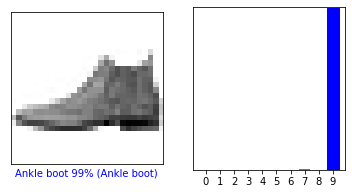

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

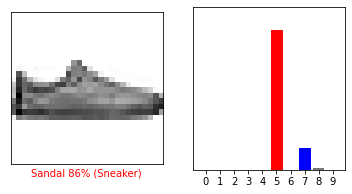

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

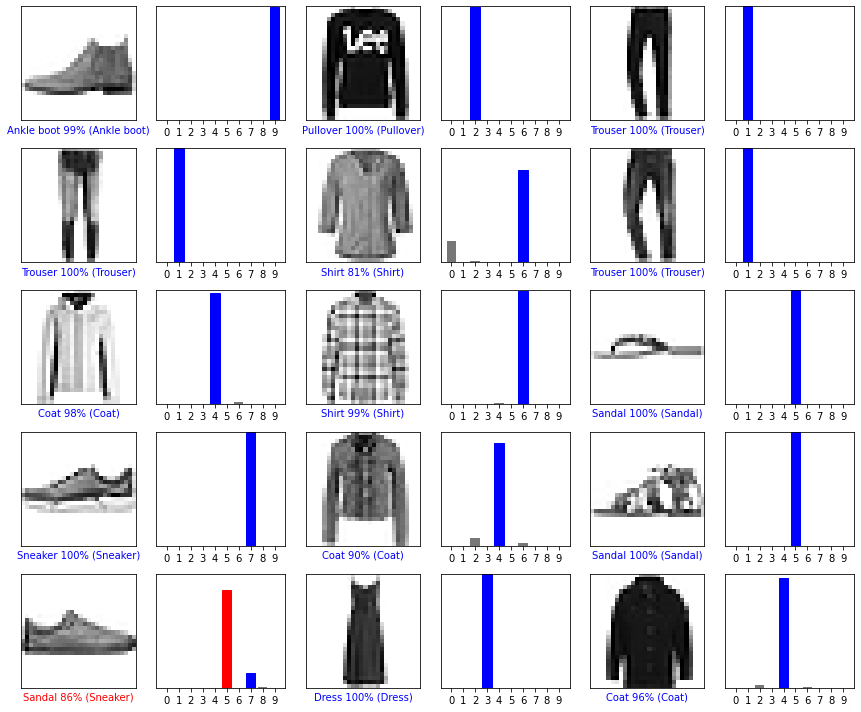

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[8.26038831e-06 1.10213664e-13 9.98591125e-01 1.16777841e-08
  1.29609776e-03 2.54965649e-11 1.04560357e-04 7.70050608e-19
  4.55051066e-11 3.53864888e-17]]


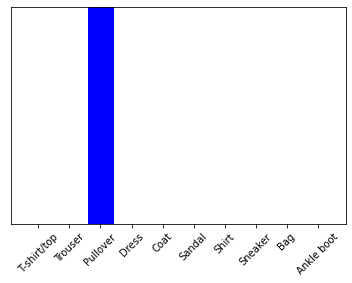

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [31]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.